### Consommation:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [10]:
data = pd.read_csv("../Téléchargements/consommation-annuelle-residentielle-par-adresse.csv", sep=";", encoding='utf-8')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771689 entries, 0 to 771688
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Année                                                          771689 non-null  int64  
 1   Code IRIS                                                      771689 non-null  object 
 2   Nom IRIS                                                       771689 non-null  object 
 3   Numéro de voie                                                 771687 non-null  float64
 4   Type de voie                                                   768874 non-null  object 
 5   Libellé de voie                                                771688 non-null  object 
 6   Code Commune                                                   771687 non-null  float64
 7   Nom Commune                                    

### Data Cleaning

In [12]:
data.head(5)

,Année,Code IRIS,Nom IRIS,Numéro de voie,Indice de répétition,Type de voie,Libellé de voie,Code Commune,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse,Code EPCI,Code Département,Code Région,Tri des adresses
0,2023,315552005,Observatoire,8.0,NaN,RUE,JOACHIM GENARD,31555.0,Toulouse,RESIDENTIEL,11.0,19.919,1.811,2.747,8 RUE JOACHIM GENARD,243100518.0,31.0,76.0,360010.0
1,2023,315552005,Observatoire,11.0,NaN,RUE,JOACHIM GENARD,31555.0,Toulouse,RESIDENTIEL,10.0,16.378,1.638,2.747,11 RUE JOACHIM GENARD,243100518.0,31.0,76.0,360018.0
2,2023,315552005,Observatoire,10.0,NaN,RUE,JOACHIM GENARD,31555.0,Toulouse,RESIDENTIEL,11.0,17.500,1.591,2.747,10 RUE JOACHIM GENARD,243100518.0,31.0,76.0,360019.0
3,2023,315552005,Observatoire,8.0,NaN,RUE,JOHANNES KEPLER,31555.0,Toulouse,RESIDENTIEL,10.0,15.853,1.585,2.747,8 RUE JOHANNES KEPLER,243100518.0,31.0,76.0,360024.0
4,2023,315552001,Arago,11.0,NaN,RUE,JOLIMONT,31555.0,Toulouse,RESIDENTIEL,21.0,84.084,4.004,2.747,11 RUE JOLIMONT,243100518.0,31.0,76.0,360036.0


In [13]:
data.duplicated().sum()
null_counts = data.isna().sum()/len(data)
print(null_counts)

Année                                                            0.000000
Code IRIS                                                        0.000000
Nom IRIS                                                         0.000000
Numéro de voie                                                   0.000003
Indice de répétition                                             0.945807
Type de voie                                                     0.003648
Libellé de voie                                                  0.000001
Code Commune                                                     0.000003
Nom Commune                                                      0.000031
Segment de client                                                0.000003
Nombre de logements                                              0.000003
Consommation annuelle totale de l'adresse (MWh)                  0.000003
Consommation annuelle moyenne par logement de l'adresse (MWh)    0.000003
Consommation annuelle moyenne de la co

In [14]:
data.drop(columns=["Indice de répétition"], inplace=True)

In [15]:
data.head(5)

,Année,Code IRIS,Nom IRIS,Numéro de voie,Type de voie,Libellé de voie,Code Commune,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse,Code EPCI,Code Département,Code Région,Tri des adresses
0,2023,315552005,Observatoire,8.0,RUE,JOACHIM GENARD,31555.0,Toulouse,RESIDENTIEL,11.0,19.919,1.811,2.747,8 RUE JOACHIM GENARD,243100518.0,31.0,76.0,360010.0
1,2023,315552005,Observatoire,11.0,RUE,JOACHIM GENARD,31555.0,Toulouse,RESIDENTIEL,10.0,16.378,1.638,2.747,11 RUE JOACHIM GENARD,243100518.0,31.0,76.0,360018.0
2,2023,315552005,Observatoire,10.0,RUE,JOACHIM GENARD,31555.0,Toulouse,RESIDENTIEL,11.0,17.500,1.591,2.747,10 RUE JOACHIM GENARD,243100518.0,31.0,76.0,360019.0
3,2023,315552005,Observatoire,8.0,RUE,JOHANNES KEPLER,31555.0,Toulouse,RESIDENTIEL,10.0,15.853,1.585,2.747,8 RUE JOHANNES KEPLER,243100518.0,31.0,76.0,360024.0
4,2023,315552001,Arago,11.0,RUE,JOLIMONT,31555.0,Toulouse,RESIDENTIEL,21.0,84.084,4.004,2.747,11 RUE JOLIMONT,243100518.0,31.0,76.0,360036.0


### Comparer la consommation sur plusieurs années

In [18]:
def compareConsommationBetweenTwoSeparateYears(year1,year2):
    # 1. Filtrer les années year1 et year2
    data_year1 = data[data['Année'] == year1]
    data_year2 = data[data['Année'] == year2]


    # 2. Identifier les communes communes aux deux années
    communes_communes = set(data_year1['Code Commune']).intersection(set(data_year2['Code Commune']))

    # 3. Filtrer les données pour ne garder que ces communes
    data_common = data[data['Code Commune'].isin(communes_communes) & data['Année'].isin([year1, year2])]

    # 4. Calculer les moyennes par année
    result = data_common.groupby('Année').agg({
        'Consommation annuelle totale de l\'adresse (MWh)': 'mean',
        'Consommation annuelle moyenne par logement de l\'adresse (MWh)': 'mean',
        'Consommation annuelle moyenne de la commune (MWh)': 'mean'
    }).reset_index()

    # 5. Renommer les colonnes
    result = result.rename(columns={
        'Consommation annuelle totale de l\'adresse (MWh)': 'Moyenne totale (MWh)',
        'Consommation annuelle moyenne par logement de l\'adresse (MWh)': 'Moyenne par logement (MWh)',
        'Consommation annuelle moyenne de la commune (MWh)': 'Moyenne communale (MWh)'
    })

    # 6. Afficher le résultat
    print(result)

In [19]:
year_counts = data['Année'].value_counts().sort_index()
print(year_counts)

Année
2018    146305
2019    149841
2020    152171
2021    106771
2022    100692
2023    115909
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def compareConsommationAcrossYears():
    years = [2018, 2019, 2020, 2021, 2022, 2023]
    data_filtered = data[data['Année'].isin(years)]
    
    # Find communes present in all years
    commune_sets = [set(data_filtered[data_filtered['Année'] == year]['Code Commune']) 
                   for year in years]
    common_communes = set.intersection(*commune_sets)
    data_common = data_filtered[data_filtered['Code Commune'].isin(common_communes)]
    
    # Calculate mean consumption per year
    result = data_common.groupby('Année').agg({
        'Consommation annuelle totale de l\'adresse (MWh)': 'mean',
        'Consommation annuelle moyenne par logement de l\'adresse (MWh)': 'mean',
        'Consommation annuelle moyenne de la commune (MWh)': 'mean'
    }).reset_index()
    
    # Rename columns
    result = result.rename(columns={
        'Consommation annuelle totale de l\'adresse (MWh)': 'Moyenne totale (MWh)',
        'Consommation annuelle moyenne par logement de l\'adresse (MWh)': 'Moyenne par logement (MWh)',
        'Consommation annuelle moyenne de la commune (MWh)': 'Moyenne communale (MWh)'
    })
    

    
    return result

In [24]:
compareConsommationAcrossYears()

,Année,Moyenne totale (MWh),Moyenne par logement (MWh),Moyenne communale (MWh)
0,2018,61.373099,2.854944,3.510120
1,2019,60.113271,2.786225,3.448744
2,2020,60.623474,2.810462,3.476202
3,2021,60.949103,2.847441,3.552883
4,2022,56.779542,2.594184,3.254050
5,2023,55.556820,2.524177,3.121028


### dictionnaire numero de region -> nom de region

In [26]:
departements_regions_2016 = {
    # Auvergne-Rhône-Alpes
    '01': 'Auvergne-Rhône-Alpes',  # Ain
    '03': 'Auvergne-Rhône-Alpes',  # Allier
    '07': 'Auvergne-Rhône-Alpes',  # Ardèche
    '15': 'Auvergne-Rhône-Alpes',  # Cantal
    '26': 'Auvergne-Rhône-Alpes',  # Drôme
    '38': 'Auvergne-Rhône-Alpes',  # Isère
    '42': 'Auvergne-Rhône-Alpes',  # Loire
    '43': 'Auvergne-Rhône-Alpes',  # Haute-Loire
    '63': 'Auvergne-Rhône-Alpes',  # Puy-de-Dôme
    '69': 'Auvergne-Rhône-Alpes',  # Rhône (circonscription départementale)
    '69D': 'Auvergne-Rhône-Alpes',  # Rhône (hors métropole de Lyon)
    '69M': 'Auvergne-Rhône-Alpes',  # Métropole de Lyon
    '73': 'Auvergne-Rhône-Alpes',  # Savoie
    '74': 'Auvergne-Rhône-Alpes',  # Haute-Savoie
    
    # Bourgogne-Franche-Comté
    '21': 'Bourgogne-Franche-Comté',  # Côte-d'Or
    '25': 'Bourgogne-Franche-Comté',  # Doubs
    '39': 'Bourgogne-Franche-Comté',  # Jura
    '58': 'Bourgogne-Franche-Comté',  # Nièvre
    '70': 'Bourgogne-Franche-Comté',  # Haute-Saône
    '71': 'Bourgogne-Franche-Comté',  # Saône-et-Loire
    '89': 'Bourgogne-Franche-Comté',  # Yonne
    '90': 'Bourgogne-Franche-Comté',  # Territoire de Belfort
    
    # Bretagne
    '22': 'Bretagne',  # Côtes-d'Armor
    '29': 'Bretagne',  # Finistère
    '35': 'Bretagne',  # Ille-et-Vilaine
    '56': 'Bretagne',  # Morbihan
    
    # Centre-Val de Loire
    '18': 'Centre-Val de Loire',  # Cher
    '28': 'Centre-Val de Loire',  # Eure-et-Loir
    '36': 'Centre-Val de Loire',  # Indre
    '37': 'Centre-Val de Loire',  # Indre-et-Loire
    '41': 'Centre-Val de Loire',  # Loir-et-Cher
    '45': 'Centre-Val de Loire',  # Loiret
    
    # Corse
    '2A': 'Corse',  # Corse-du-Sud
    '2B': 'Corse',  # Haute-Corse
    
    # Grand Est
    '08': 'Grand Est',  # Ardennes
    '10': 'Grand Est',  # Aube
    '51': 'Grand Est',  # Marne
    '52': 'Grand Est',  # Haute-Marne
    '54': 'Grand Est',  # Meurthe-et-Moselle
    '55': 'Grand Est',  # Meuse
    '57': 'Grand Est',  # Moselle
    '67': 'Grand Est',  # Bas-Rhin
    '68': 'Grand Est',  # Haut-Rhin
    '88': 'Grand Est',  # Vosges
    
    # Hauts-de-France
    '02': 'Hauts-de-France',  # Aisne
    '59': 'Hauts-de-France',  # Nord
    '60': 'Hauts-de-France',  # Oise
    '62': 'Hauts-de-France',  # Pas-de-Calais
    '80': 'Hauts-de-France',  # Somme
    
    # Île-de-France
    '75': 'Île-de-France',  # Paris
    '77': 'Île-de-France',  # Seine-et-Marne
    '78': 'Île-de-France',  # Yvelines
    '91': 'Île-de-France',  # Essonne
    '92': 'Île-de-France',  # Hauts-de-Seine
    '93': 'Île-de-France',  # Seine-Saint-Denis
    '94': 'Île-de-France',  # Val-de-Marne
    '95': 'Île-de-France',  # Val-d'Oise
    
    # Normandie
    '14': 'Normandie',  # Calvados
    '27': 'Normandie',  # Eure
    '50': 'Normandie',  # Manche
    '61': 'Normandie',  # Orne
    '76': 'Normandie',  # Seine-Maritime
    
    # Nouvelle-Aquitaine
    '16': 'Nouvelle-Aquitaine',  # Charente
    '17': 'Nouvelle-Aquitaine',  # Charente-Maritime
    '19': 'Nouvelle-Aquitaine',  # Corrèze
    '23': 'Nouvelle-Aquitaine',  # Creuse
    '24': 'Nouvelle-Aquitaine',  # Dordogne
    '33': 'Nouvelle-Aquitaine',  # Gironde
    '40': 'Nouvelle-Aquitaine',  # Landes
    '47': 'Nouvelle-Aquitaine',  # Lot-et-Garonne
    '64': 'Nouvelle-Aquitaine',  # Pyrénées-Atlantiques
    '79': 'Nouvelle-Aquitaine',  # Deux-Sèvres
    '86': 'Nouvelle-Aquitaine',  # Vienne
    '87': 'Nouvelle-Aquitaine',  # Haute-Vienne
    
    # Occitanie
    '09': 'Occitanie',  # Ariège
    '11': 'Occitanie',  # Aude
    '12': 'Occitanie',  # Aveyron
    '30': 'Occitanie',  # Gard
    '31': 'Occitanie',  # Haute-Garonne
    '32': 'Occitanie',  # Gers
    '34': 'Occitanie',  # Hérault
    '46': 'Occitanie',  # Lot
    '48': 'Occitanie',  # Lozère
    '65': 'Occitanie',  # Hautes-Pyrénées
    '66': 'Occitanie',  # Pyrénées-Orientales
    '81': 'Occitanie',  # Tarn
    '82': 'Occitanie',  # Tarn-et-Garonne
    
    # Pays de la Loire
    '44': 'Pays de la Loire',  # Loire-Atlantique
    '49': 'Pays de la Loire',  # Maine-et-Loire
    '53': 'Pays de la Loire',  # Mayenne
    '72': 'Pays de la Loire',  # Sarthe
    '85': 'Pays de la Loire',  # Vendée
    
    # Provence-Alpes-Côte d'Azur
    '04': 'PACA',  # Alpes-de-Haute-Provence
    '05': 'PACA',  # Hautes-Alpes
    '06': 'PACA',  # Alpes-Maritimes
    '13': 'PACA',  # Bouches-du-Rhône
    '83': 'PACA',  # Var
    '84': 'PACA',  # Vaucluse
    
    # Départements et régions d'outre-mer (chaque DOM est aussi une région)
    '971': 'Guadeloupe',
    '972': 'Martinique',
    '973': 'Guyane',
    '974': 'La Réunion',
    '976': 'Mayotte'
}

In [27]:
data['Nom de region'] = (
    data['Code Département']
    .dropna()  # On ignore les valeurs manquantes pour la conversion
    .astype(int)
    .astype(str)
    .map(departements_regions_2016)
)


### La Consommation Par Region Sur Plusieurs années

In [28]:
print(data['Nom de region'].unique().tolist())

['Occitanie', 'Normandie', 'Hauts-de-France', 'Île-de-France', nan, 'Bourgogne-Franche-Comté', 'Centre-Val de Loire', 'Auvergne-Rhône-Alpes', 'PACA', 'Pays de la Loire', 'Nouvelle-Aquitaine', 'Grand Est', 'Bretagne']


In [29]:
def plot_topN_regional_consumption(regions):
    years = [2018, 2019, 2020, 2021, 2022, 2023]
    
    if len(regions):
        # Filter data for selected years and regions
        filtered_data = data[(data['Année'].isin(years)) & 
                           (data['Nom de region'].isin(regions))]
    else:
        filtered_data = data[(data['Année'].isin(years))]
        regions = data['Nom de region'].unique().tolist()
        
    print(f"Nombre de données filtrées : {len(filtered_data)}")
    
    # Create pivot table with only the selected regions
    pivot_data = filtered_data.groupby(['Année', 'Nom de region'])['Consommation annuelle moyenne de la commune (MWh)'].mean().unstack()
    
    # Plot only the regions we want
    plt.figure(figsize=(12, 6))
    for region in regions:
        if region in pivot_data.columns:  # Check if region exists in data
            plt.plot(pivot_data.index, pivot_data[region], 
                    marker='o', 
                    linewidth=2,
                    label=region)
    
    plt.title(f'Consommation Moyenne par Région ({years[0]}-{years[-1]})')
    plt.xlabel('Année')
    plt.ylabel('Consommation moyenne (MWh)')
    plt.xticks(years)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Région', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

Nombre de données filtrées : 771689


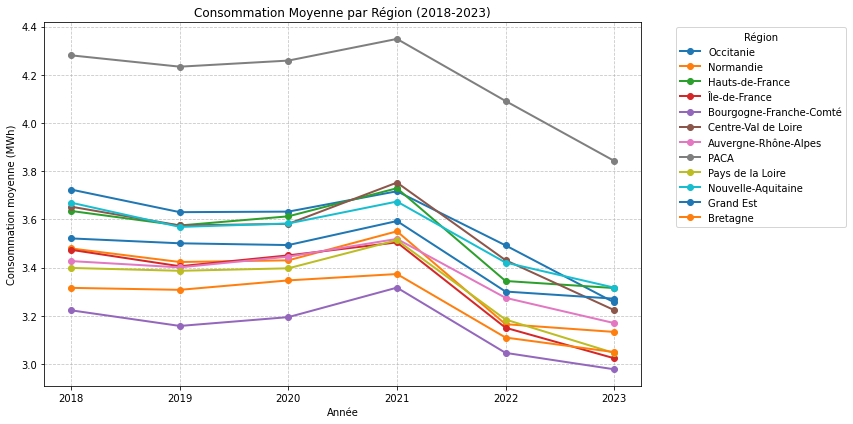

In [31]:
plot_topN_regional_consumption([])